In [1]:
# data set: # mac       - phase III - LPR
# goal:     see y trends

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns
from statannot import add_stat_annotation

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/1_before_bmd/phase_III/LPR_quantify_y


In [4]:
# mac       - phase III - LPR - 240 timepoints - full
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/full/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


In [5]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

215

In [6]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
#display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

501

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


## Load morphological data for filtering wells that have dead fish

In [7]:
#mac       - phase III - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/morpho/full/wide/Tanguay_Phase_3_zf_morphology_data_PNNL_2021MAR23_full_w_all_endpoints.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,725,21511,A01,725_21511_A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,725,21511,A02,725_21511_A02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,725,21511,A03,725_21511_A03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,725,21511,A04,725_21511_A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725,21511,A05,725_21511_A05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


61419

In [8]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# 13 seconds took for 215 chemicals

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05


Done, it took:13.6 seconds


In [9]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(44762, 246)
df_lpr_filtered.shape:(39256, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05


In [10]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]


time_index_sec_start = 5
ori_max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))

print ("(before transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))

if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)

num_time_points = 0
for time_index in range(int(ori_max_time_index_sec / group_size)):
    num_time_points += 1
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(ori_max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("(after  transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))

#print ("\nlen(np.unique(df_lpr_min['chemical.id'])):")
#display(len(np.unique(df_lpr_min['chemical.id'])))
#print ("\nnp.unique(df_lpr_min['chemical.id']):")
#display(np.unique(df_lpr_min['chemical.id']))


#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# took 6 seconds for 215 chemicals

interval:1 min
(before transforming for 1 min), df_lpr_min.shape:(39256, 4)
(after  transforming for 1 min), df_lpr_min.shape:(39256, 28)
Conversion of time interval is done. It took 5.3 seconds


In [11]:
display(df_lpr_min.head())
display(len(df_lpr_min))

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,234,67.0,14389,A01,5.480000,0.000,0.000,4.158,0.000,0.000000,0.000000,0.000,0.000,12.220,0.000,0.000,9.919,0.0,0.000,59.031999,0.000000,0.986,2.021,0.000,0.00,85.125001,0.000,2.404000,234_67.0
1,234,67.0,14389,A02,33.752000,0.522,0.000,0.000,7.687,0.000000,0.609000,1.160,0.757,9.876,2.816,3.812,1.195,0.0,2.020,3.732000,3.739000,6.530,6.356,0.742,8.53,0.000000,6.738,3.389000,234_67.0
2,234,67.0,14389,A03,19.194999,91.907,42.862,44.456,77.291,76.214000,63.429001,0.835,0.000,3.158,30.556,78.792,41.188,0.0,2.041,37.662000,63.738001,74.355,1.071,0.000,0.00,26.874000,68.008,88.879999,234_67.0
3,234,67.0,14389,A04,5.473000,0.000,0.000,0.000,0.000,82.775001,21.046000,29.244,18.868,0.591,0.673,0.000,17.788,0.0,0.000,0.000000,0.759000,0.000,12.964,35.136,0.00,0.000000,0.000,39.428000,234_67.0
4,234,67.0,14389,A05,23.419000,0.000,0.000,0.000,3.371,6.509000,10.989000,2.490,1.234,0.000,5.972,1.406,1.233,0.0,0.000,1.186000,77.170000,0.000,0.199,0.000,0.00,6.510000,2.535,4.766000,234_67.0


39256

### All concentrations

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,234,67.0,14389,A01,5.480000,0.000,0.000,4.158,0.000,0.000000,0.000000,0.000,0.000,12.220,0.000,0.000,9.919,0.0,0.000,59.031999,0.000000,0.986,2.021,0.000,0.00,85.125001,0.000,2.404000,234_67.0
1,234,67.0,14389,A02,33.752000,0.522,0.000,0.000,7.687,0.000000,0.609000,1.160,0.757,9.876,2.816,3.812,1.195,0.0,2.020,3.732000,3.739000,6.530,6.356,0.742,8.53,0.000000,6.738,3.389000,234_67.0
2,234,67.0,14389,A03,19.194999,91.907,42.862,44.456,77.291,76.214000,63.429001,0.835,0.000,3.158,30.556,78.792,41.188,0.0,2.041,37.662000,63.738001,74.355,1.071,0.000,0.00,26.874000,68.008,88.879999,234_67.0
3,234,67.0,14389,A04,5.473000,0.000,0.000,0.000,0.000,82.775001,21.046000,29.244,18.868,0.591,0.673,0.000,17.788,0.0,0.000,0.000000,0.759000,0.000,12.964,35.136,0.00,0.000000,0.000,39.428000,234_67.0
4,234,67.0,14389,A05,23.419000,0.000,0.000,0.000,3.371,6.509000,10.989000,2.490,1.234,0.000,5.972,1.406,1.233,0.0,0.000,1.186000,77.170000,0.000,0.199,0.000,0.00,6.510000,2.535,4.766000,234_67.0


df_lpr_min.shape:(39256, 29)
/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/1_before_bmd/phase_III/LPR_quantify_y
Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full_all_conc.png
Done, it took:0.1 seconds


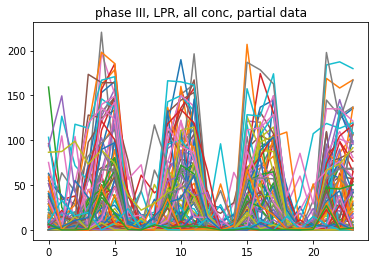

In [16]:
# Plot few lpr curves to check transition points
start_time = time.time()

display(df_lpr_min.head())
print ("df_lpr_min.shape:" + str(df_lpr_min.shape)) #(39256, 29)

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

ax.plot(np.transpose(df_lpr_min.iloc[10:123,time_index_start:time_index_start + num_time_points].values));
plt.title('phase III, LPR, all conc, partial data')

#ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start + num_time_points].values));
#plt.title('phase III, LPR, all conc, full data')

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_all_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
#plt.savefig(output_filename, bbox_inches="tight")

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))

In [ ]:
# box-whisker plot, mean displacement, dark only
column_name = 'y_mean'

y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,7:10], axis = 1).values)
y_arr = np.transpose(y_arr)
display (len(y_arr))
df_y = pd.DataFrame(y_arr, columns=[column_name])
df_y["cycle"] = str("1_dark")
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,13:16], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2_dark', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,19:22], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3_dark', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,25:28], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4_dark', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = column_name
order = ['1_dark', '2_dark', '3_dark', '4_dark']
#order = ['1_dark', '4_dark']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)

add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1_dark", "2_dark"), ("2_dark", "3_dark"), ("3_dark", "4_dark")],
                    #box_pairs=[("1_dark", "4_dark")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.title('phase III, LPR, all conc, dark only, mean displacement')
plt.ylim((0, 100))

array([[  4.1579999 ],
       [  7.68700017],
       [197.96099968],
       [ 82.77500057],
       [  9.8800001 ]])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_dark v.s. 2_dark: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.029e-57 U_stat=7.199e+08
2_dark v.s. 3_dark: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.832e-02 U_stat=7.633e+08
3_dark v.s. 4_dark: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.216e-02 U_stat=7.781e+08


Text(0.5, 1.0, 'phase III, LPR, all conc, dark only, total displacement')

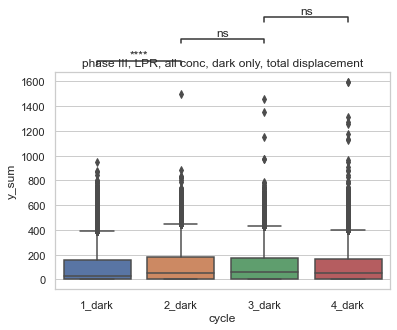

In [21]:
# box-whisker plot, total displacement, dark only
y_arr = []
y_arr.append(df_lpr_min.iloc[:,7:10].sum(axis=1).values)
y_arr = np.transpose(y_arr)
display (y_arr[:5])
df_y = pd.DataFrame(y_arr, columns=['y_sum'])
df_y["cycle"] = str("1_dark")
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,13:16].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2_dark', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,19:22].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3_dark', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,25:28].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4_dark', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = "y_sum"
order = ['1_dark', '2_dark', '3_dark', '4_dark']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)#.set_title('lalala')

add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1_dark", "2_dark"), ("2_dark", "3_dark"), ("3_dark", "4_dark")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.title('phase III, LPR, all conc, dark only, total displacement')
#plt.ylim((0, 250))

In [ ]:
# mean displacement, light only
column_name = 'y_mean'

y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,4:7], axis = 1).values)
y_arr = np.transpose(y_arr)
display (len(y_arr))
df_y = pd.DataFrame(y_arr, columns=[column_name])
df_y["cycle"] = str("1_light")
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,10:13], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2_light', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,16:19], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3_light', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,22:25], axis = 1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4_light', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = column_name
order = ['1_light', '2_light', '3_light', '4_light']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)

add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1_light", "2_light"), ("2_light", "3_light"), ("3_light", "4_light")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.title('phase III, LPR, all conc, light only, mean displacement')
plt.ylim((0, 10))

In [ ]:
#total displacement, light only
y_arr = []
y_arr.append(df_lpr_min.iloc[:,4:7].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y = pd.DataFrame(y_arr, columns=['y_sum'])
df_y["cycle"] = str("1_light")
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,10:13].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2_light', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,16:19].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3_light', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,22:25].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4_light', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = "y_sum"
order = ['1_light', '2_light', '3_light', '4_light']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)
add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1_light", "2_light"), ("2_light", "3_light"), ("3_light", "4_light")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.title('phase III, LPR, all conc, light only, total displacement')
plt.ylim((0, 40))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.030e-15 U_stat=7.449e+08
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.897e-01 U_stat=7.646e+08
3 v.s. 4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.579e-02 U_stat=7.794e+08


Text(0.5, 1.0, 'phase III, all conc, light & dark, total displacement')

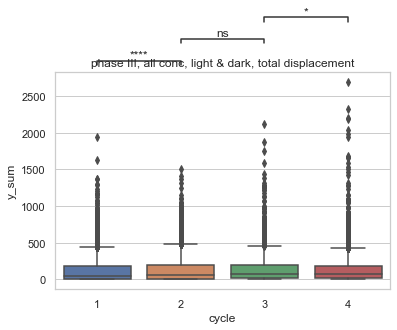

In [30]:
# dark & light, total displacement
y_arr = []
y_arr.append(df_lpr_min.iloc[:,4:10].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y = pd.DataFrame(y_arr, columns=['y_sum'])
df_y["cycle"] = str("1")
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,10:16].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,16:22].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3', inplace=True)
############
y_arr = []
y_arr.append(df_lpr_min.iloc[:,22:28].sum(axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=['y_sum'])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = "y_sum"
order = ['1', '2', '3', '4']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)
add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("2", "3"), ("3", "4")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.title('phase III, all conc, light & dark, total displacement')
#plt.ylim((0, 250))

In [ ]:
# phase III, all conc, light & dark, mean displacement
column_name = 'y_mean'

y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,4:10], axis=1).values)
y_arr = np.transpose(y_arr)
display (y_arr[:2])
df_y = pd.DataFrame(y_arr, columns=[column_name])
df_y["cycle"] = str("1")
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,10:16], axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('2', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,16:22], axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('3', inplace=True)
############
y_arr = []
y_arr.append(np.mean(df_lpr_min.iloc[:,22:28], axis=1).values)
y_arr = np.transpose(y_arr)
df_y_to_concat = pd.DataFrame(y_arr, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['cycle'].fillna('4', inplace=True)
################

sns.set(style="whitegrid")
x = "cycle"
y = column_name
order = ['1', '2', '3', '4']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)

add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("2", "3"), ("3", "4")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

plt.title('phase III, all conc, light & dark, mean displacement')
plt.ylim((0, 50))

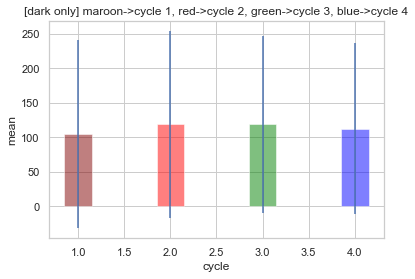

In [40]:
#[bar plot, dark only]
alpha=0.5

plt.bar(1, round(np.mean(df_0_conc.iloc[:,7:10].sum(axis=1).values),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar(2, round(np.mean(df_0_conc.iloc[:,13:16].sum(axis=1).values),2),    color ='red',width = 0.3, alpha=alpha)
plt.bar(3, round(np.mean(df_0_conc.iloc[:,19:22].sum(axis=1).values),2),    color ='green',width = 0.3, alpha=alpha)
plt.bar(4, round(np.mean(df_0_conc.iloc[:,25:28].sum(axis=1).values),2),    color ='blue',width = 0.3, alpha=alpha)

y_arr = []
y_arr.append(round(np.mean(df_0_conc.iloc[:,7:10].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,13:16].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,19:22].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,25:28].sum(axis=1).values),2))


y_err = []
y_err.append(np.std(df_0_conc.iloc[:,7:10].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,13:16].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,19:22].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,25:28].sum(axis=1).values))

plt.errorbar([1,2,3,4], y_arr, yerr=y_err, ls='none')

plt.title("[dark only] maroon->cycle 1, red->cycle 2, green->cycle 3, blue->cycle 4")
plt.xlabel("cycle")
plt.ylabel("mean")

plt.show()

In [63]:
#[bar plot, dark only]

print ("mean:", round(np.mean(df_0_conc.iloc[:,7:10].sum(axis=1).values),2))
print ("median:", round(np.median(df_0_conc.iloc[:,7:10].sum(axis=1).values),2))
print ("std:", round(np.std(df_0_conc.iloc[:,7:10].sum(axis=1).values),2))
print ("max:", round(np.max(df_0_conc.iloc[:,7:10].sum(axis=1).values),2))
print ("min:", round(np.min(df_0_conc.iloc[:,7:10].sum(axis=1).values),2))

mean: 104.33
median: 36.34
std: 136.49
max: 740.61
min: 0.0


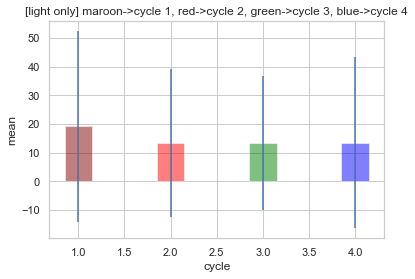

In [41]:
#[light only]
alpha=0.5

plt.bar(1, round(np.mean(df_0_conc.iloc[:,4:7].sum(axis=1).values),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar(2, round(np.mean(df_0_conc.iloc[:,10:13].sum(axis=1).values),2),    color ='red',width = 0.3, alpha=alpha)
plt.bar(3, round(np.mean(df_0_conc.iloc[:,16:19].sum(axis=1).values),2),    color ='green',width = 0.3, alpha=alpha)
plt.bar(4, round(np.mean(df_0_conc.iloc[:,22:25].sum(axis=1).values),2),    color ='blue',width = 0.3, alpha=alpha)
    
y_arr = []
y_arr.append(round(np.mean(df_0_conc.iloc[:,4:7].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,10:13].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,16:19].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,22:25].sum(axis=1).values),2))

y_err = []
y_err.append(np.std(df_0_conc.iloc[:,4:7].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,10:13].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,16:19].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,22:25].sum(axis=1).values))

plt.errorbar([1,2,3,4], y_arr, yerr=y_err, ls='none')

plt.title("[light only] maroon->cycle 1, red->cycle 2, green->cycle 3, blue->cycle 4")
plt.xlabel("cycle")
plt.ylabel("mean")

plt.show()

array([ 22.3969996 ,  12.87599993,  58.72499973, ..., 245.000999  ,
        24.86600026, 133.29299975])

123.61471580712755

148.41320487243897

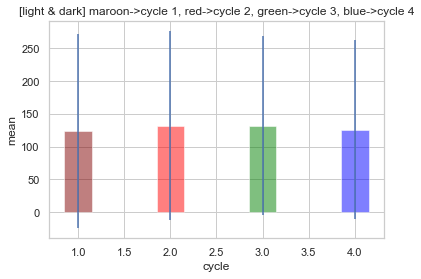

In [42]:
#[light & dark]
alpha=0.5

display(df_0_conc.iloc[:,4:10].sum(axis=1).values)
display(np.mean(df_0_conc.iloc[:,4:10].sum(axis=1).values))
display(np.std(df_0_conc.iloc[:,4:10].sum(axis=1).values))

plt.bar(1, round(np.mean(df_0_conc.iloc[:,4:10].sum(axis=1).values),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar(2, round(np.mean(df_0_conc.iloc[:,10:16].sum(axis=1).values),2),    color ='red',width = 0.3, alpha=alpha)
plt.bar(3, round(np.mean(df_0_conc.iloc[:,16:22].sum(axis=1).values),2),    color ='green',width = 0.3, alpha=alpha)
plt.bar(4, round(np.mean(df_0_conc.iloc[:,22:28].sum(axis=1).values),2),    color ='blue',width = 0.3, alpha=alpha)
    
y_arr = []
y_arr.append(round(np.mean(df_0_conc.iloc[:,4:10].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,10:16].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,16:22].sum(axis=1).values),2))
y_arr.append(round(np.mean(df_0_conc.iloc[:,22:28].sum(axis=1).values),2))

y_err = []
y_err.append(np.std(df_0_conc.iloc[:,4:10].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,10:16].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,16:22].sum(axis=1).values))
y_err.append(np.std(df_0_conc.iloc[:,22:28].sum(axis=1).values))

plt.errorbar([1,2,3,4], y_arr, yerr=y_err, ls='none')

plt.title("[light & dark] maroon->cycle 1, red->cycle 2, green->cycle 3, blue->cycle 4")
plt.xlabel("cycle")
plt.ylabel("mean")

plt.show()

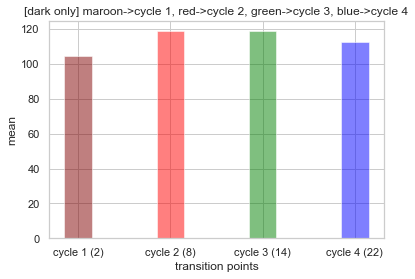

In [47]:
alpha=0.5

plt.bar("cycle 1 (2)", round(np.mean(df_0_conc.iloc[:,7:10].sum(axis=1).values),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("cycle 2 (8)", round(np.mean(df_0_conc.iloc[:,13:16].sum(axis=1).values),2),    color ='red',width = 0.3, alpha=alpha)
plt.bar("cycle 3 (14)", round(np.mean(df_0_conc.iloc[:,19:22].sum(axis=1).values),2),    color ='green',width = 0.3, alpha=alpha)
plt.bar("cycle 4 (22)", round(np.mean(df_0_conc.iloc[:,25:28].sum(axis=1).values),2),    color ='blue',width = 0.3, alpha=alpha)
    
plt.title("[dark only] maroon->cycle 1, red->cycle 2, green->cycle 3, blue->cycle 4")
plt.xlabel("transition points")
plt.ylabel("mean")
plt.show()

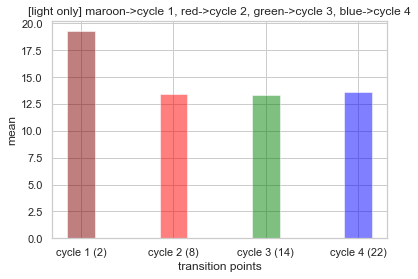

In [48]:
alpha=0.5

plt.bar("cycle 1 (2)", round(np.mean(df_0_conc.iloc[:,4:7].sum(axis=1).values),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("cycle 2 (8)", round(np.mean(df_0_conc.iloc[:,10:13].sum(axis=1).values),2),    color ='red',width = 0.3, alpha=alpha)
plt.bar("cycle 3 (14)", round(np.mean(df_0_conc.iloc[:,16:19].sum(axis=1).values),2),    color ='green',width = 0.3, alpha=alpha)
plt.bar("cycle 4 (22)", round(np.mean(df_0_conc.iloc[:,22:25].sum(axis=1).values),2),    color ='blue',width = 0.3, alpha=alpha)
    
plt.title("[light only] maroon->cycle 1, red->cycle 2, green->cycle 3, blue->cycle 4")
plt.xlabel("transition points")
plt.ylabel("mean")

plt.show()

In [ ]:
#'''## See sum of y values per interval in all ccp (chemical_conc_plate)
#0-6,
#6-12,
#12-18,
#18-24
trans_points = [2,8,14,20] # "Paritosh official"

df_lpr_min_ccp = df_0_conc.copy()
#df_lpr_min_ccp = df_partial_0_conc.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

#f_out = open("report.txt","w+")
values_sum_trans_2  = []
values_sum_trans_8  = []
values_sum_trans_14 = []
values_sum_trans_20 = []

print (len(np.unique(df_lpr_min_ccp.chemical_conc_plate)))

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    df_per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(df_per_ccp.head())
    
    for trans_index, trans_point in enumerate(trans_points):
        former_timepoints_mean = 999
        arr_diff = []
        #print ("\ntrans_point:" + str(trans_point))
        values_sum_in_this_time_interval = 0
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            #print ("current_timepoint:" + str(current_timepoint))
            values = df_per_ccp[current_timepoint]
            #print ("type(values):\n" + str(type(values)))
            print ("values:\n" + str(values))
#            print ("values.sum():\n" + str(values.sum()))
            values_sum_in_this_time_interval = values_sum_in_this_time_interval + values.sum()
            #print ("len(values):\n" + str(len(values)))
            
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        #print ("arr_diff:"+str(arr_diff))
        print_this = "values_sum for trans_points " + str(trans_point) + " : " + str(round(values_sum_in_this_time_interval,2))
        #print (print_this)
        max_diff = max(arr_diff)
        index_of_max_diff = arr_diff.index(max_diff)
        
        unique_ccp = np.unique(df_per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + ", index_of_max_diff: " + str(index_of_max_diff) + "\n"
        #print (save_this)
        
        #print (index_of_max_arr_diff)
        #f_out.write(save_this)
        if (trans_point == 2):
            values_sum_trans_2.append(values_sum_in_this_time_interval)
        elif (trans_point == 8):
             values_sum_trans_8.append(values_sum_in_this_time_interval)
        elif (trans_point == 14):
            values_sum_trans_14.append(values_sum_in_this_time_interval)
        else: # (trans_point == 20):
            values_sum_trans_20.append(values_sum_in_this_time_interval)
        
#f_out.close()
print ("Biggest change of peaks in each ccp is identified")

In [ ]:
print (len(values_sum_trans_2))
values_sum_trans_2
#print (values_sum_trans_2)


transition points at 2->3 min
mean: 1545.31 , std: 928.8
median: 1345.08
max: 5163.7 , min: 70.12

transition points at 8->9 min
mean: 1653.19 , std: 845.7
median: 1513.58
max: 4398.92 , min: 87.6

transition points at 14->15 min
mean: 1652.33 , std: 836.39
median: 1531.17
max: 6695.42 , min: 193.5

transition points at 20->21 min
mean: 1576.69 , std: 868.99
median: 1427.98
max: 8972.75 , min: 98.9


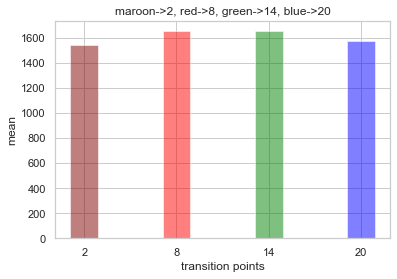

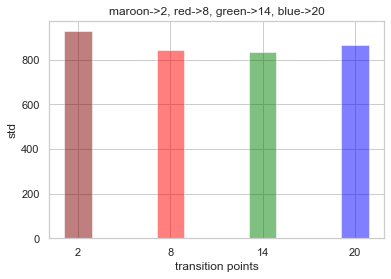

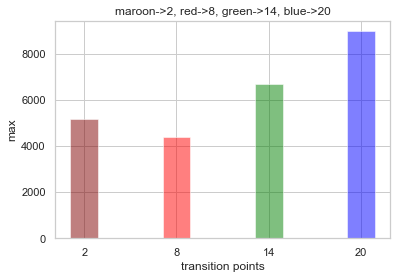

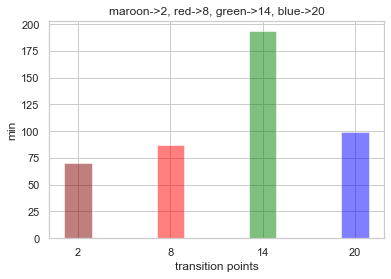

In [51]:
print ("\ntransition points at 2->3 min")
print ("mean:", round(np.mean(values_sum_trans_2),2), ", std:", round(np.std(values_sum_trans_2),2))
print ("median:", round(np.median(values_sum_trans_2),2))
print ("max:", round(np.max(values_sum_trans_2),2), ", min:", round(np.min(values_sum_trans_2),2))

print ("\ntransition points at 8->9 min")
#print ("arr_max_index_per_trans_8:" + str(arr_max_index_per_trans_8))
print ("mean:", round(np.mean(values_sum_trans_8),2), ", std:", round(np.std(values_sum_trans_8),2))
print ("median:", round(np.median(values_sum_trans_8),2))
print ("max:", round(np.max(values_sum_trans_8),2), ", min:", round(np.min(values_sum_trans_8),2))

print ("\ntransition points at 14->15 min")
print ("mean:", round(np.mean(values_sum_trans_14),2), ", std:", round(np.std(values_sum_trans_14),2))
print ("median:", round(np.median(values_sum_trans_14),2))
print ("max:", round(np.max(values_sum_trans_14),2), ", min:", round(np.min(values_sum_trans_14),2))

print ("\ntransition points at 20->21 min")
print ("mean:", round(np.mean(values_sum_trans_20),2), ", std:", round(np.std(values_sum_trans_20),2))
print ("median:", round(np.median(values_sum_trans_20),2))
print ("max:", round(np.max(values_sum_trans_20),2), ", min:", round(np.min(values_sum_trans_20),2))

alpha=0.5

plt.bar("2", round(np.mean(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.mean(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.mean(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.mean(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("mean")
plt.show()


plt.bar("2", round(np.std(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.std(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.std(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.std(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("std")
plt.show()


plt.bar("2", round(np.max(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.max(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.max(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.max(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("max")
plt.show()

plt.bar("2", round(np.min(values_sum_trans_2),2),     color ='maroon',width = 0.3, alpha=alpha)
plt.bar("8", round(np.min(values_sum_trans_8),2),     color ='red',   width = 0.3, alpha=alpha)
plt.bar("14", round(np.min(values_sum_trans_14),2),   color ='green', width = 0.3, alpha=alpha)
plt.bar("20", round(np.min(values_sum_trans_20),2),   color ='blue',  width = 0.3, alpha=alpha)
    
plt.title("maroon->2, red->8, green->14, blue->20")
plt.xlabel("transition points")
plt.ylabel("min")
plt.show()

In [52]:
df_lpr_min.get_value(10, 't1')

AttributeError: 'DataFrame' object has no attribute 'get_value'

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t1', 't2', 't3', 't4', 't5', 't6'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t7', 't8', 't9', 't10', 't11', 't12'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t13', 't14', 't15', 't16', 't17', 't18'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t19', 't20', 't21', 't22', 't23'])

In [ ]:
display(len(df_lpr_min_ccp))
display(df_lpr_min_ccp)

In [ ]:
####### stop here
a=b

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

df_delta_0_conc = df_lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()